회귀분석 실습 2  
공공 자전거 수요 예측(Bike Sharing Demand)  
https://www.kaggle.com/c/bike-sharing-demand/overview  
- 데이터 소개
  - 날짜 및 시간, 기온, 습도, 풍속 등의 정보를 정보를  
    기반으로 1시간 간격으로 자전거 대여 횟수를 기록한 데이터.  

  - 기록 날짜는 2011년 1월 ~ 2012년 12월까지  
    데이터에 자세한 정보는 소개된 캐글 사이트에서 확인 가능.  

Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [183]:
import calendar
import numpy as np
import pandas as pd
#from pandas.core.frame import DataFrame
#from pandas.core.series import Series #이렇게 불러도 됨.
import seaborn as sns # 통계적 plot
from scipy import stats #통계
import missingno as msno #결측치 보는 plot
from datetime import datetime #day
import matplotlib.pyplot as plt
import warnings #에러는 아닌데 주희하는게 뜨는것을 방지.
warnings.filterwarnings('ignore')
df_train = pd.read_csv('C:/Users/5/My_Study/Z_running_file/bike-sharing-demand/train.csv')
df_test = pd.read_csv('C:/Users/5/My_Study/Z_running_file/bike-sharing-demand/train.csv')



In [184]:
df_train.columns # df_train의 컬럼 이름들을 리스트 형태로 반환

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [185]:
df_test.columns # df_test의 컬럼 이름들을 리스트 형태로 반환

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [186]:
print(df_train.shape,df_test.shape) # train, test의 행렬 개수 출력 (10886, 12) (6493, 9)

(10886, 12) (10886, 12)


In [187]:
df_train.describe() # 데이터프레임의 기초 통계량을 요약

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [188]:
df_train.info() # datetime : object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [189]:
df_train['datetime'] # 0번째 : 2011-01-01 00:00:00

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [190]:
df_train["date"] = df_train.datetime.apply(lambda x : x.split()[0])
df_train["hour"] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0])
df_train["weekday"] = df_train.date.apply(lambda dateString : calendar.day_name[
    datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_train["month"] = df_train.date.apply(lambda dateString : calendar.month_name[
    datetime.strptime(dateString,"%Y-%m-%d").month])
df_train["season"] = df_train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
df_train["weather"] = df_train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
# 첫 번째 줄은 datetime 열에서 날짜 부분만 추출하여 date 열에 저장합니다.
# 두 번째 줄은 datetime 열에서 시간 부분만 추출하여 hour 열에 저장합니다.
# 세 번째 줄은 date 열의 값들을 이용하여 요일(월요일, 화요일 등)을 계산하여 weekday 열에 저장합니다.
    # 이때, datetime.strptime() 함수를 이용하여 날짜 형식을 파싱한 뒤,
    # calendar.day_name 리스트를 이용하여 요일 이름을 얻습니다.
# 네 번째 줄은 date 열의 값들을 이용하여 월 이름을 계산하여 month 열에 저장합니다.
    # 이때, datetime.strptime() 함수를 이용하여 날짜 형식을 파싱한 뒤,
    # calendar.month_name 리스트를 이용하여 월 이름을 얻습니다.
# 다섯 번째 줄은 season 열의 값들을 1, 2, 3, 4에서 Spring, Summer, Fall, Winter로 변경하여
    # season 열에 저장합니다.
# 여섯 번째 줄은 weather 열의 값들을 1, 2, 3, 4에서 각각의 날씨 형태 문자열로 변경하여
    # weather 열에 저장합니다.
    # 이때, 문자열 안에서 '' 기호를 이용하여 여러 줄에 걸쳐 문자열을 작성할 수 있습니다.

datetime 컬럼에서 날짜와 시간 정보를 분리하여 date와 hour 컬럼을 추가합니다.  
date 컬럼에서 요일 정보를 추출하여 weekday 컬럼을 추가합니다.  
date 컬럼에서 월(month) 정보를 추출하여 month 컬럼을 추가합니다.  
season 컬럼의 값이 1, 2, 3, 4인 경우를 각각  
봄(Spring), 여름(Summer), 가을(Fall), 겨울(Winter)로 매핑하여 season 컬럼을 업데이트 합니다.  
weather 컬럼의 값이 1, 2, 3, 4인 경우를 각각  
Clear + Few clouds + Partly cloudy + Partly cloudy, Mist + Cloudy, Mist + Broken clouds,  
Mist + Few clouds, Mist, Light Snow, Light Rain + Thunderstorm + Scattered clouds,  
Light Rain + Scattered clouds, Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
로 매핑하여 weather 컬럼을 업데이트 합니다.

In [191]:
df_train.info() # 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  hour        10886 non-null  object 
 14  weekday     10886 non-null  object 
 15  month       10886 non-null  object 
dtypes: float64(3), int64(6), object(7)
memory usage: 1.3+ MB


In [192]:
categoryVariablesList = ['hour','weekday','month','season','weather','holiday','workingday']
for var in categoryVariablesList:
    df_train[var] = df_train[var].astype('category')
# 위와 같지만 더 간략한 간단하고 방법

In [193]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


- 결측치 확인

<Axes: >

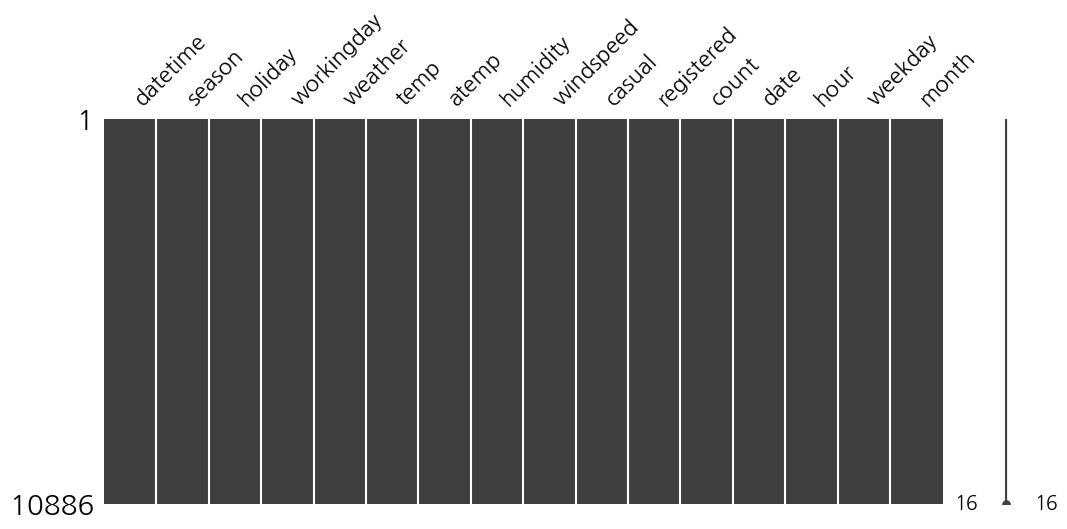

In [194]:
import missingno as msno #결측치 보는 plot
msno.matrix(df_train,figsize=(12,5)) #결측치가 있다면 하얀색 줄이 그어짐.

In [195]:
df_train_1 = df_train.copy() #훼손 방지
df_test_1 = df_test.copy()

df_train_1['datetime'] = pd.to_datetime(df_train_1['datetime']) # ,format='%Y-%m-%d %H:%M:%S'

In [196]:
type(df_train_1)

pandas.core.frame.DataFrame

In [197]:
# DataFrame 가능한 것.
df_train_1['year'] = df_train_1['datetime'].dt.year
df_train_1['month'] = df_train_1['datetime'].dt.month
df_train_1['day'] = df_train_1['datetime'].dt.day
df_train_1['hour'] = df_train_1['datetime'].dt.hour
df_train_1['minute'] = df_train_1['datetime'].dt.minute
df_train_1['second'] = df_train_1['datetime'].dt.second
# 요일 데이터 - 일요일은 0
df_train_1['dayofweek'] = df_train_1['datetime'].dt.dayofweek

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'Hour rental amount')]

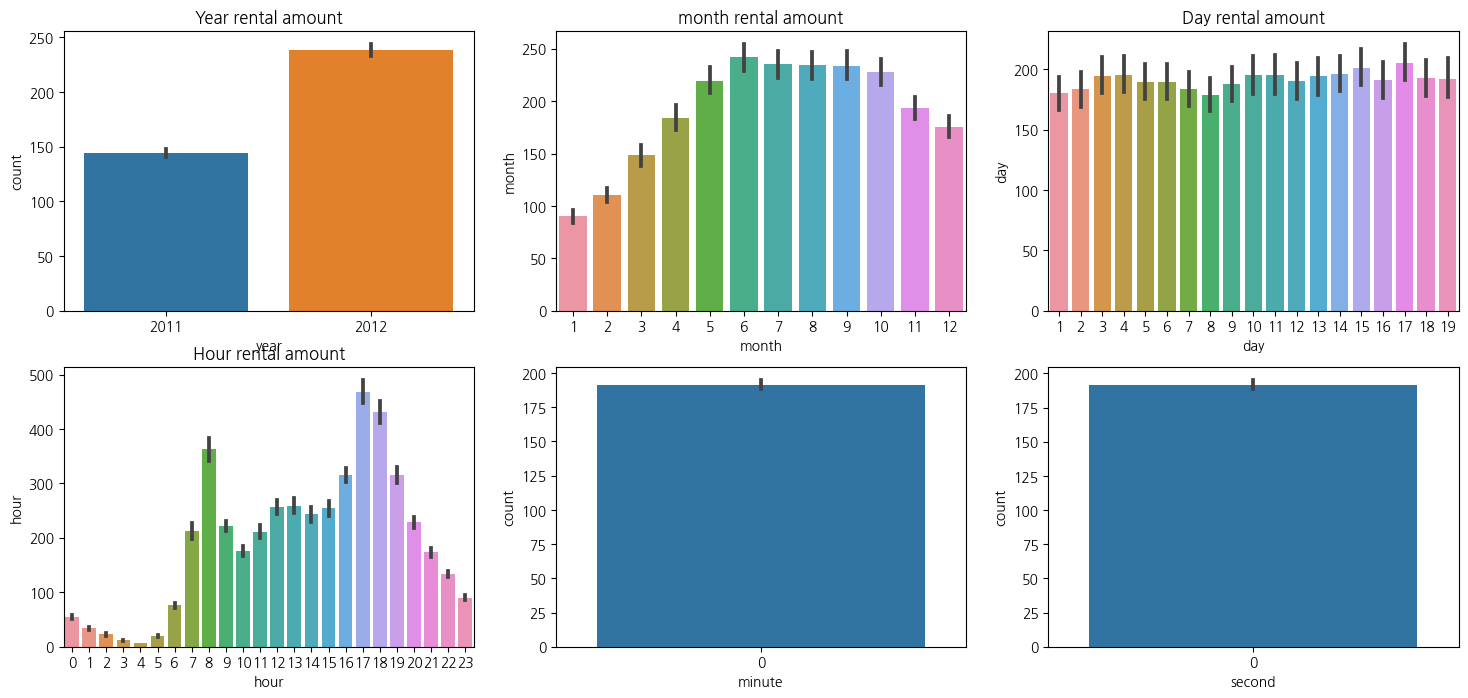

In [198]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6))=plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(18,8)

sns.barplot(data = df_train_1, x='year', y='count',ax=ax1)
sns.barplot(data = df_train_1, x='month', y='count',ax=ax2)
sns.barplot(data = df_train_1, x='day', y='count',ax=ax3)
sns.barplot(data = df_train_1, x='hour', y='count',ax=ax4)
sns.barplot(data = df_train_1, x='minute', y='count',ax=ax5)
sns.barplot(data = df_train_1, x='second', y='count',ax=ax6)

ax1.set(ylabel='count', title='Year rental amount')
ax2.set(ylabel='month', title='month rental amount')
ax3.set(ylabel='day', title='Day rental amount')
ax4.set(ylabel='hour', title='Hour rental amount')
# Day는 분석하면 안됨. > 달마다 요일이 달라서 카운트 다 다름, > 지표가 달라짐 > 분석모델X

Month rental amount을 보면, 겨울로 분리되는 12월의 경우  
초봄인 3~4월의 대여량과 비슷하다는 점이었다.  
워싱턴의 날씨 변화는 우리나라의 사계절과 비슷하다.  
(여기서 알수 있는 점은 계절의 영향은 별로 없구나)

또한 hour 파트에서 아침7시와 저녁 6~7시의 수요량이 다른 시간대들과 비교했을 때  
굉장히 높은 것을 알 수 있다.  
이는 출퇴근길에 자전거를 많이 이용하는 사람들이 많다고 예측해 볼 수 있다.  
(주말과 나눠서 보는 것이 필요하다.) 혹시라도 뭐가 다를지 모르겠어서

일별 대여량은 1일부터 19일까지만 있고 나머지 날짜의 경우는 test데이터에 들어가있다.  
따라서 이 변수는 피쳐로 사용하면 안 된다!  

Quantile, Quartile, Percentile 개념 정리  
참고 : https://blog.eunsukim.me/posts/understanding-quantile-quartile-and-percentile

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

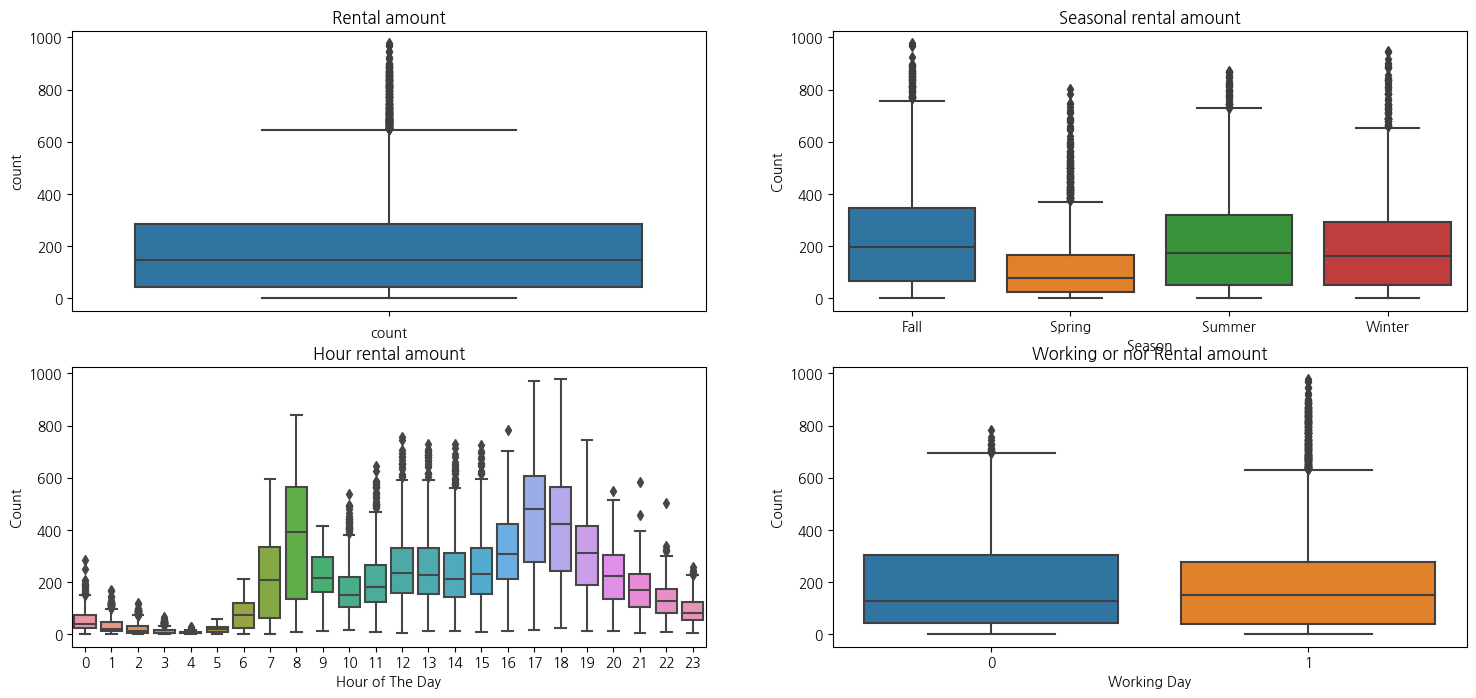

In [199]:
fig, axes= plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1, y='count', orient='v', ax=axes[0][0])
sns.boxplot(data = df_train_1, y='count', x='season', orient='v', ax=axes[0][1])
sns.boxplot(data = df_train_1, y='count', x='hour', orient='v', ax=axes[1][0])
sns.boxplot(data = df_train_1, y='count', x='workingday', orient='v', ax=axes[1][1])

axes[0][0].set(xlabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season', ylabel='Count', title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day', ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day', ylabel='Count', title='Working or nor Rental amount')

<Axes: xlabel='hour', ylabel='count'>

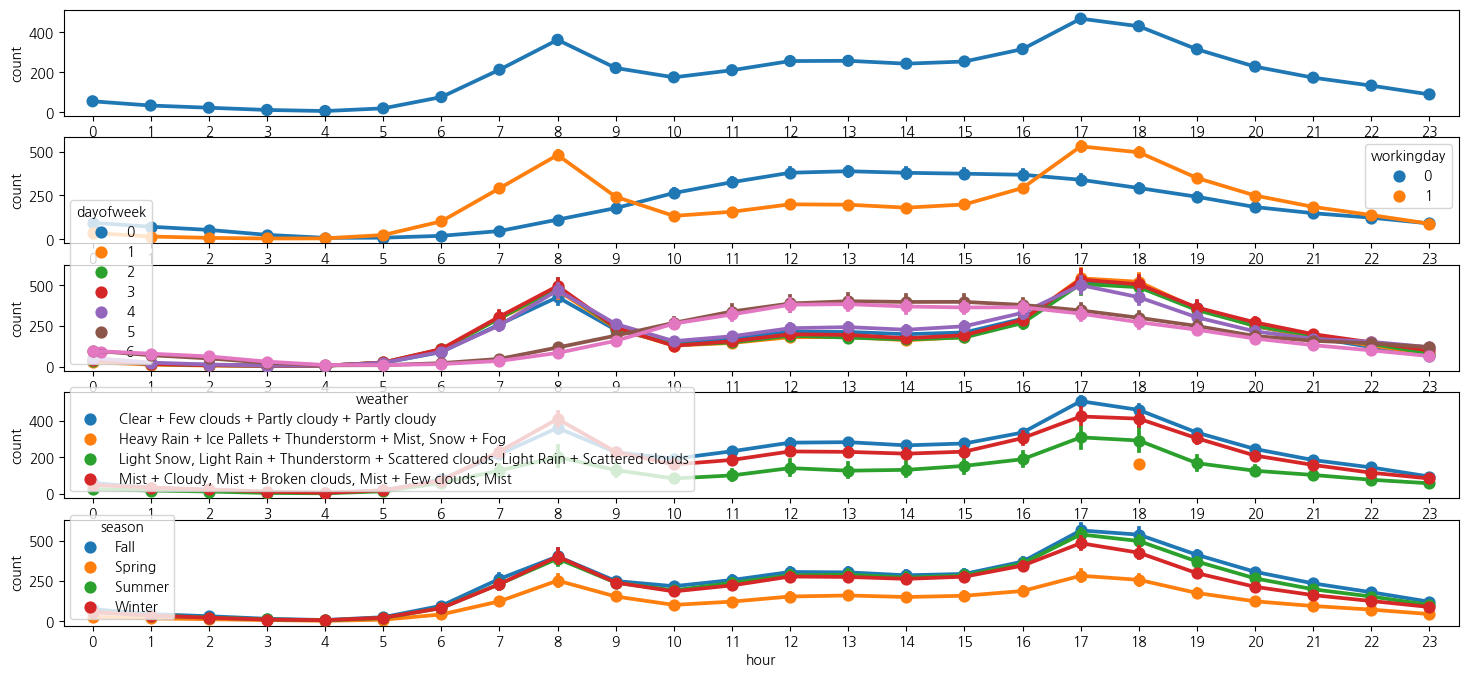

In [200]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,8)

# 꺾은 선 그래프
sns.pointplot(data=df_train_1, x='hour', y='count', ax=ax1)
sns.pointplot(data=df_train_1, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=df_train_1, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=df_train_1, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=df_train_1, x='hour', y='count', hue='season', ax=ax5)

# ax=ax1은 plt.subplots() 함수로 생성한 여러개의 서브플롯 중에서 현재 그래프를 그릴 서브플롯을 지정하는 인자
# 예를 들어 plt.subplots(nrows=2, ncols=2)로 2행 2열의 서브플롯을 만들면  
# 각각 ax1, ax2, ax3, ax4라는 이름의 서브플롯 객체가 생성됩니다.  
# ax=ax1을 지정하면 첫 번째 서브플롯인 ax1에 대해 그래프를 그림
# "axis"는 플롯의 축, axes는 ax의 복수형 형태: ax와 axes를 서로 바꿔 써도 결과는 동일: 둘중 하나 일관 사용

위 그래프를 보면 대여량은 특정 기간에 머물러 있고 특히 근무일이 아닐 때 대여량이 더 많은 것을 알 수 있다.
- 상관관계

In [201]:
df_train_2 = df_train_1[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = df_train_2.corr()
print(corrMatt)
mask = np.array(corrMatt)
#Return the indices for the upper-triangle of arr.
#상삼각행렬
mask[np.tril_indices_from(mask)]=False#상삼각행렬 False -> 하삼각행렬

                temp     atemp    casual  registered  humidity  windspeed   
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852  \
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<Axes: >

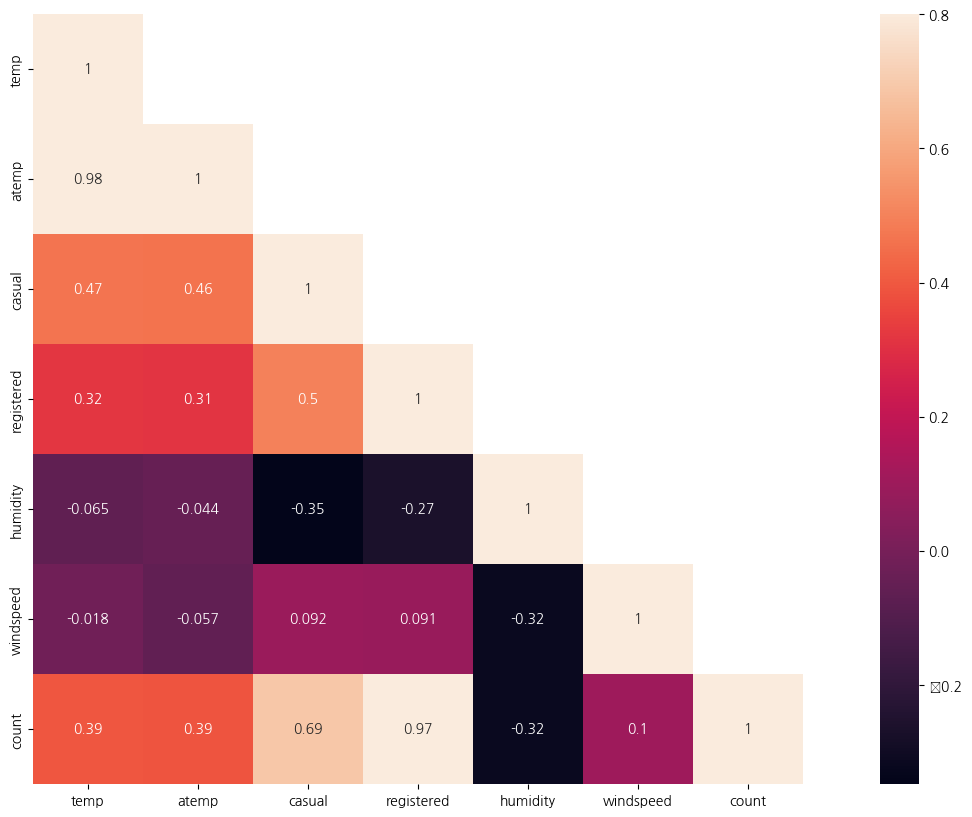

In [202]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

1. temp, humidity, windspeed는 상관관계가 거의 없다.
2. registered, casual는 상관관계가 높다!
3. atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피쳐로 사용하기에 적합하지 않을 수 있다.

regplot으로 산점도 plot을 그림

<Axes: xlabel='humidity', ylabel='count'>

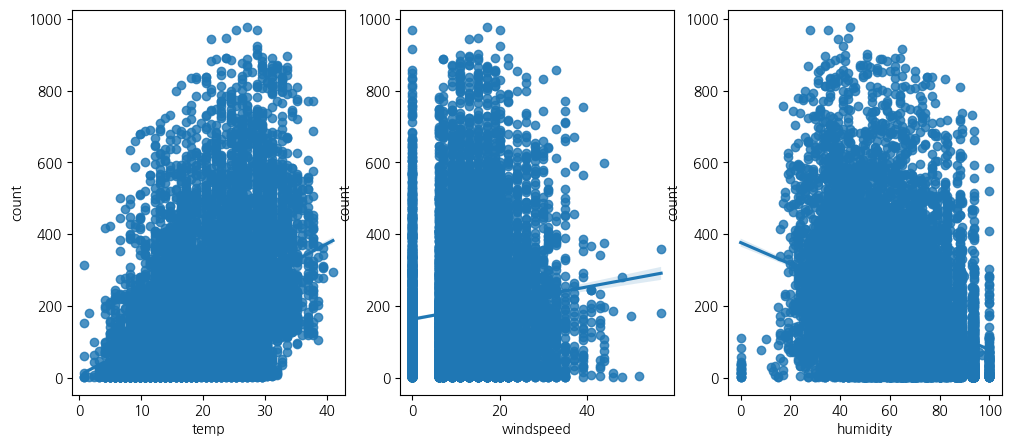

In [203]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data = df_train_1,ax=ax1)
sns.regplot(x='windspeed',y='count',data = df_train_1,ax=ax2)
sns.regplot(x='humidity',y='count',data = df_train_1,ax=ax3)
# temp, winspeed, humidity -> 회귀로 절대 못 맞힘
# (상관계수가 낮음-> scatter -> drop 하는 것이 좋지 않을까? -> 항상 좋을까? -> 실험적이여야 함)


windspeed의 경우 0에 숫자가 몰려 있는 것으로 보아,  
아마도 관측되지 않은 어떤 수치에 대해 0으로 기록 된 것이 아닐까 추측

In [204]:
# 월별 데이터 모아보기
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)
df_train_1["year_month"] = df_train_1["datetime"].apply(concatenate_year_month)
print(df_train_1.shape)
df_train_1[["datetime", "year_month"]].head()

(10886, 22)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<Axes: xlabel='year_month', ylabel='count'>

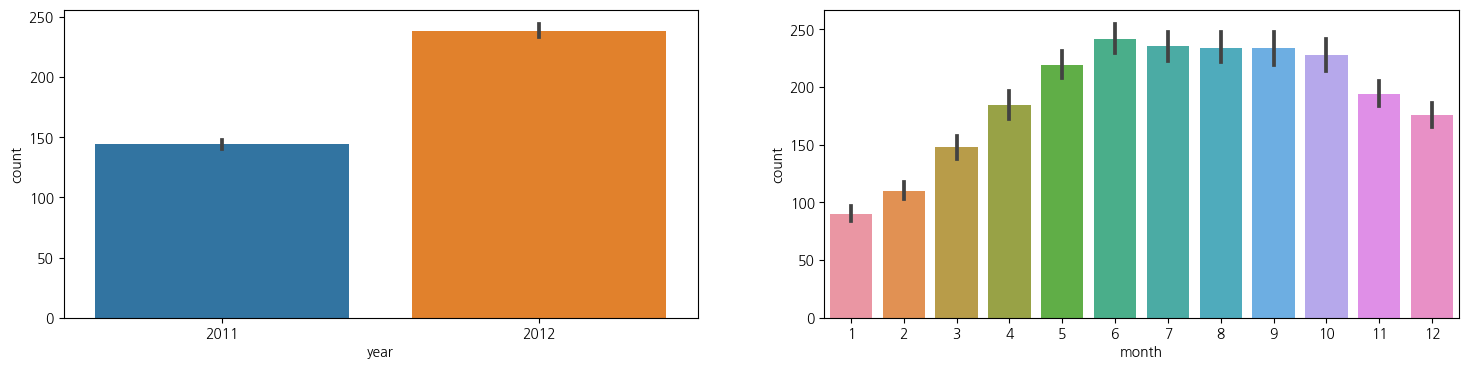

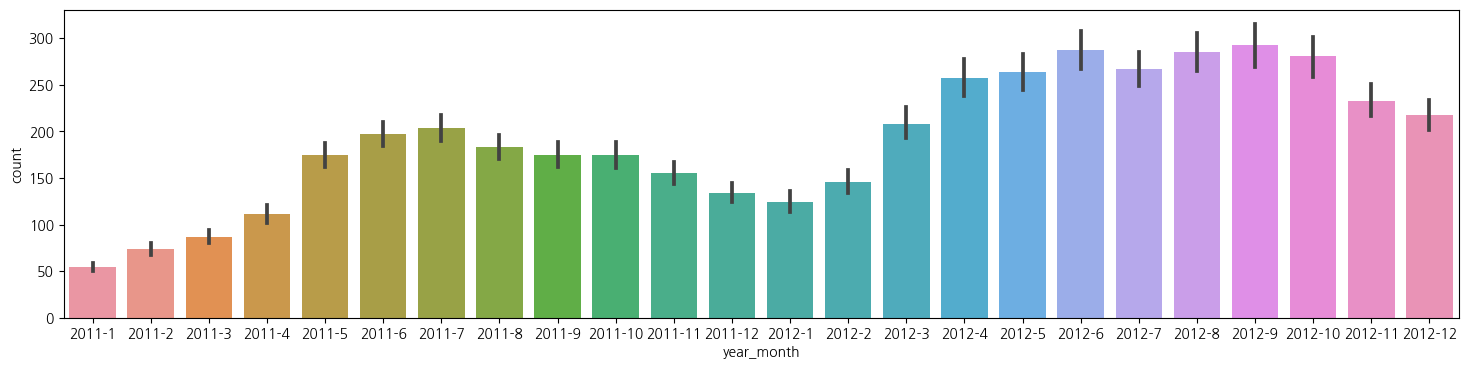

In [205]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data= df_train_1, x="year", y='count', ax=ax1)
sns.barplot(data= df_train_1, x='month', y='count', ax=ax2)

fig,ax3= plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=df_train_1, x='year_month', y='count', ax=ax3)

이상치 처리

방법1) IQR(Interquartile Range) = Q3(75%)-Q1(25%)  

Q1−1.5∗IQR :   최소 제한선  
Q3+1.5∗IQR :   최대 제한선  
범위를 좀 더 조정  
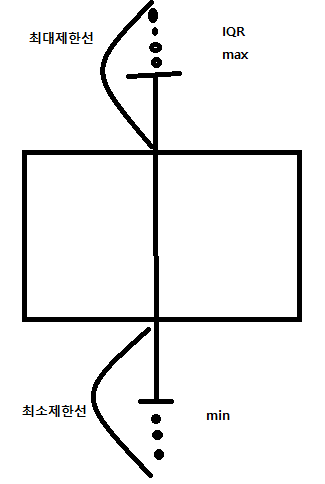

In [206]:
#'count' 데이터에서 전체의 25%에 해당하는 데이터 조회
count_q1 = np.percentile(df_train_1['count'],25)
count_q1

#'count' 데이터에서 전체의 75%에 해당하는 데이터 조회
count_q3 = np.percentile(df_train_1['count'],75)
count_q3

# IQR = Q3-Q1
count_IQR = count_q3 - count_q1
count_IQR

# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
df_train_1_IQR = df_train_1[(df_train_1['count']>=(count_q1 - (1.5*count_IQR))) &
                          (df_train_1['count']<=(count_q3 + (1.5*count_IQR)))]
print(df_train_1_IQR)


                 datetime  season holiday workingday   
0     2011-01-01 00:00:00  Spring       0          0  \
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp   
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395  \
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

## 방법2) 3-sigma, 평균 ± 3* 표준편차차

                 datetime  season holiday workingday   
0     2011-01-01 00:00:00  Spring       0          0  \
1     2011-01-01 01:00:00  Spring       0          0   
2     2011-01-01 02:00:00  Spring       0          0   
3     2011-01-01 03:00:00  Spring       0          0   
4     2011-01-01 04:00:00  Spring       0          0   
...                   ...     ...     ...        ...   
10881 2012-12-19 19:00:00  Winter       0          1   
10882 2012-12-19 20:00:00  Winter       0          1   
10883 2012-12-19 21:00:00  Winter       0          1   
10884 2012-12-19 22:00:00  Winter       0          1   
10885 2012-12-19 23:00:00  Winter       0          1   

                                                 weather   temp   atemp   
0       Clear + Few clouds + Partly cloudy + Partly c...   9.84  14.395  \
1       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
2       Clear + Few clouds + Partly cloudy + Partly c...   9.02  13.635   
3       Clear + Few clouds 

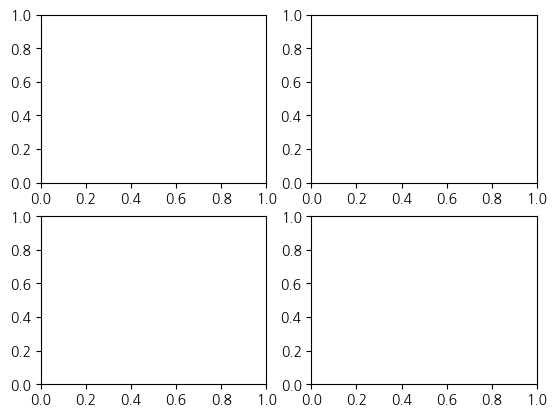

In [207]:
fig, axes = plt.subplots(nrows=2,ncols=2)
df_train_1_sigma = df_train_1[np.abs(df_train_1['count'] - df_train_1['count'].mean()) < 
                              (3*df_train_1['count'].std())]
print(df_train_1_sigma)
#약 100개 정도 잃어버림

- IQR을 적용 그림

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

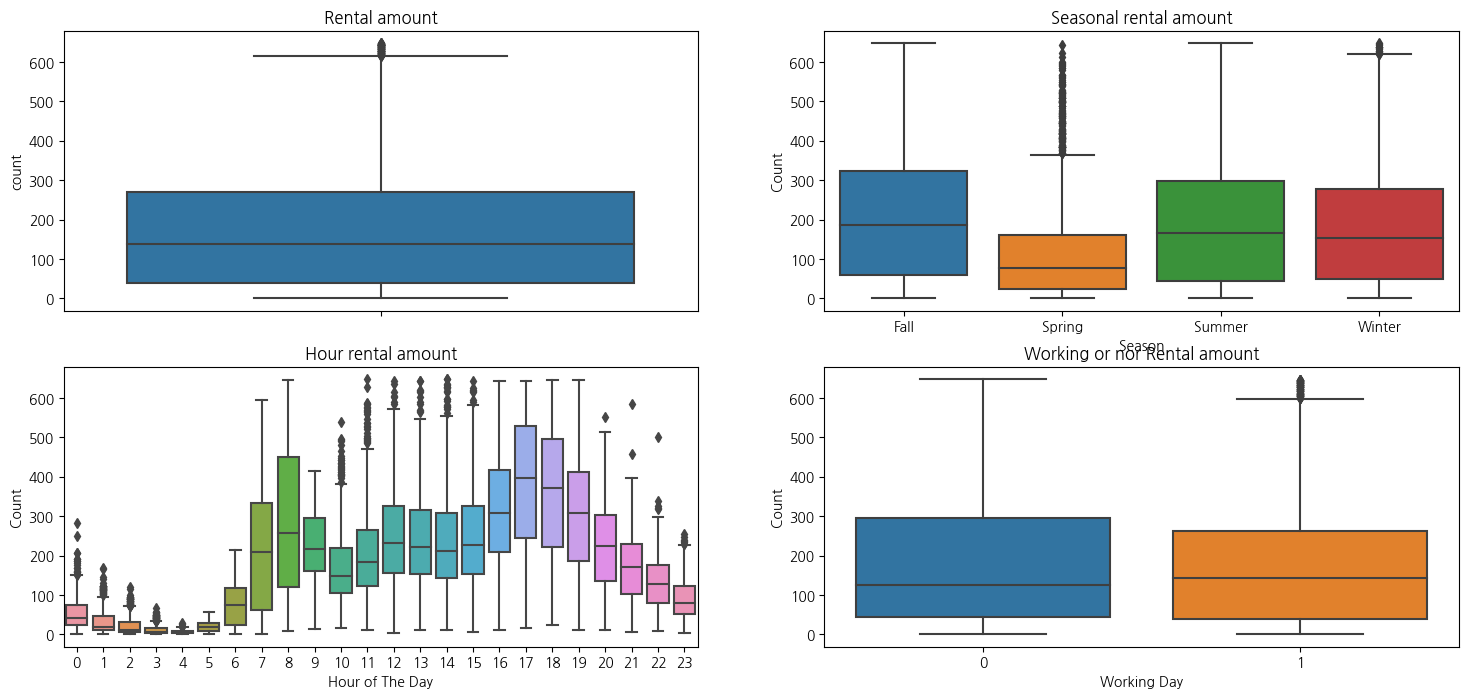

In [208]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1_IQR, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1_IQR, y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1_IQR, y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1_IQR, y='count',x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season',ylabel='Count', title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day',ylabel='Count', title='Working or nor Rental amount')

- 3-sigma 적용 그림

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working or nor Rental amount')]

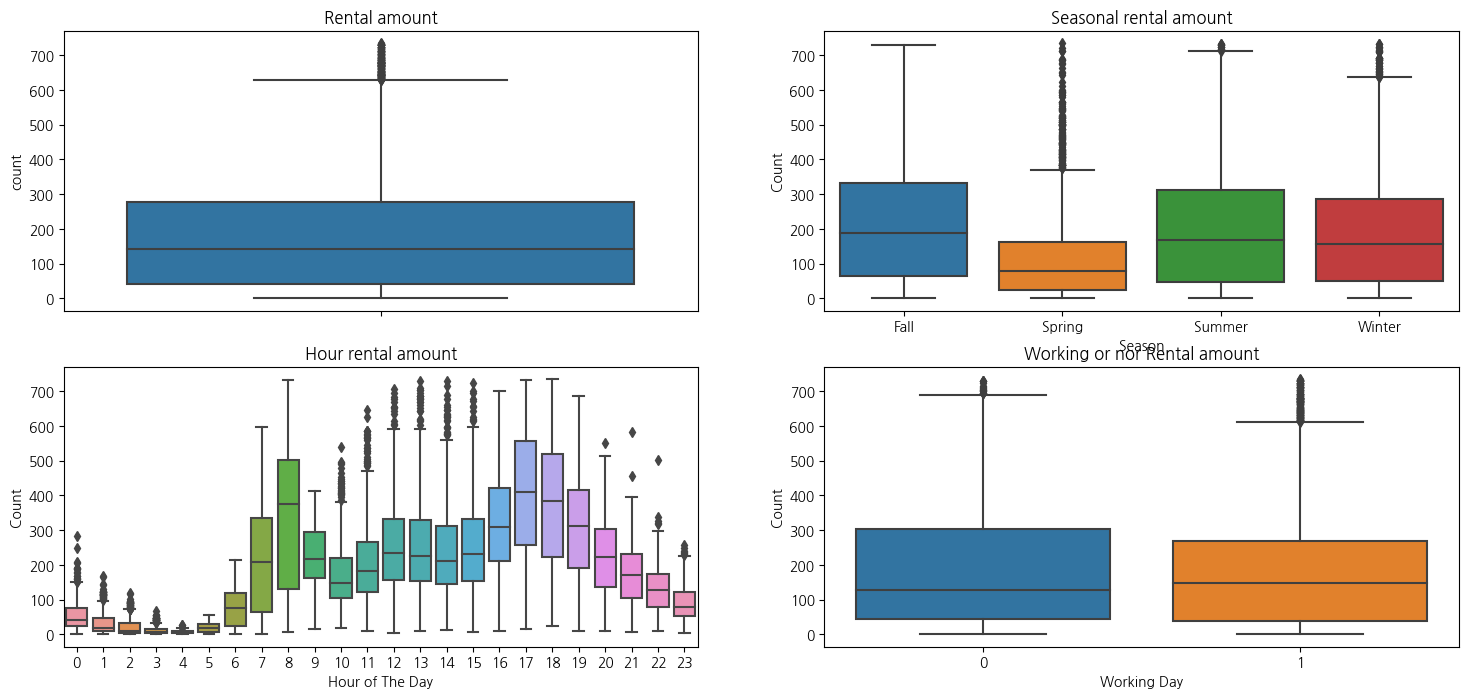

In [209]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)

sns.boxplot(data = df_train_1_sigma, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data = df_train_1_sigma, y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data = df_train_1_sigma, y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data = df_train_1_sigma, y='count',x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count', title='Rental amount')
axes[0][1].set(xlabel='Season',ylabel='Count', title='Seasonal rental amount')
axes[1][0].set(xlabel='Hour of The Day',ylabel='Count', title='Hour rental amount')
axes[1][1].set(xlabel='Working Day',ylabel='Count', title='Working or nor Rental amount')

- 모델 적용 # 여기부터 안댐

In [228]:
dataTrain = pd.read_csv("C:/Users/5/My_Study/Z_running_file/bike-sharing-demand/train.csv")
dataTest = pd.read_csv("C:/Users/5/My_Study/Z_running_file/bike-sharing-demand/train.csv")

In [229]:
# 이거 append 없다고 안됨 아랫줄 코드로 대체함 
# data = dataTrain.append(dataTest)
# data.reset_index(inplace=True)
# data.drop('index',inplace=True,axis=1)

# pandas 2.0 부터 append 없음, concat에 통합

In [230]:
data = pd.concat([dataTrain, dataTest], ignore_index=True)
# ignore_index=True 옵션은 두 데이터 프레임의 인덱스를 무시하고 새로운 인덱스를 부여합니다.
# 그리고 reset_index 함수 대신 data.reset_index(drop=True, inplace=True)를 사용하여 새로운 인덱스를 적용합니다.
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

- Feature Engineering

In [231]:
data['date'] = data.datetime.apply(lambda x:x.split()[0])
data['hour'] = data.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')
data['year'] = data.datetime.apply(lambda x:x.split()[0].split('-')[0])
data['weekday'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').weekday())
data['month'] = data.date.apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d' ).month)

- 데이터 변환.

In [232]:
categoricalFeatureNames=['season','holiday','workingday','weather','weekday','month','year','hour']
numericalFeatureName = ['temp','humidity','windspeed','atemp']
dropFeatures = ['casual','count','datetime','date','registered']

In [233]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype('category')

- Splitting Train and Test Data

In [234]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=['datetime'])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=['datetime'])
datetimecol = dataTest['datetime']
yLabels = dataTrain['count']
yLabelsRegistered = dataTrain['registered']
tLabelsCasual = dataTrain['casual']

In [235]:
dataTrain

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,0,2011,5,1
10886,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,0,2011,5,1
10887,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21,2012,2,12
21770,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,2012,2,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22,2012,2,12
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012-12-19,23,2012,2,12


- Dropping Unncessary Variables

In [236]:
dataTrain = dataTrain.drop(dropFeatures, axis=1)
dataTest = dataTest.drop(dropFeatures, axis=1)

RMSLE Scorer

In [237]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#np.nan_to_num : Replace NaN with zero and infinity with large finite numbers (default behaviour) 
#or with the numbers defined by the user using the nan, posinf and/or neginf keywords.

In [238]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
#sklearn의 mean_squared_error 이용해 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))


#MSE, RMSE, RMSLE 계산
def evaluate_rgre(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

Numeri으로 변환

In [239]:
# 분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
# pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
# errors='coerce' : 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환.
dataTrain['year'] = pd.to_numeric(dataTrain.year,errors='coerce')
dataTrain['month'] = pd.to_numeric(dataTrain.month,errors='coerce')
dataTrain['hour'] = pd.to_numeric(dataTrain.hour,errors='coerce')
dataTrain['weekday'] = pd.to_numeric(dataTrain.weekday,errors='coerce')

dataTrain['season'] = pd.to_numeric(dataTrain.season,errors='coerce')
dataTrain['holiday'] = pd.to_numeric(dataTrain.holiday,errors='coerce')
dataTrain['workingday'] = pd.to_numeric(dataTrain.workingday,errors='coerce')
dataTrain['weather'] = pd.to_numeric(dataTrain.weather,errors='coerce')

Linear Regression Model

In [240]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

RMSLE Value For Linear Regression:  0.9778188829547169


- Ridge regression(릿지 회귀)와 Lasso regression(라쏘 회귀)   

Reige : 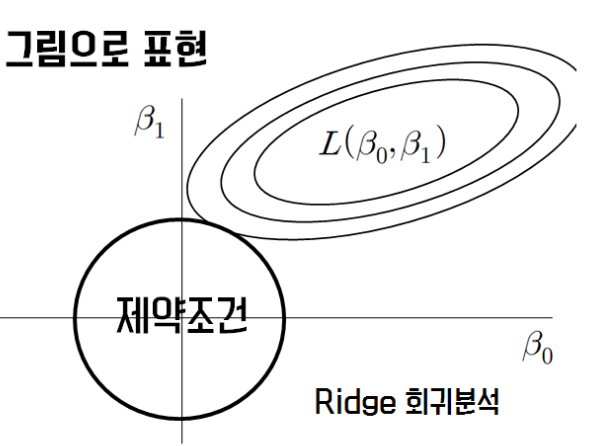  
Lasso : 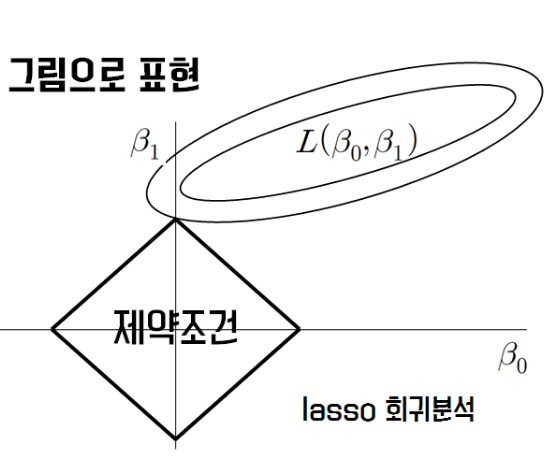

- Regularization Model-Ridge

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.977818875375688
CPU times: total: 703 ms
Wall time: 855 ms


<Axes: xlabel='param_alpha', ylabel='rmsle'>

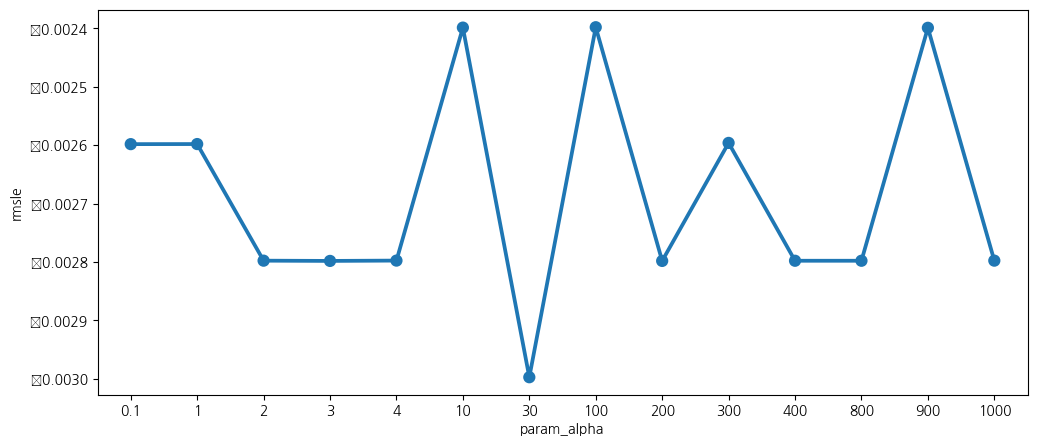

In [247]:
%%time
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression 0.977818875375688
CPU times: total: 922 ms
Wall time: 1.11 s


<Axes: xlabel='param_alpha', ylabel='rmsle'>

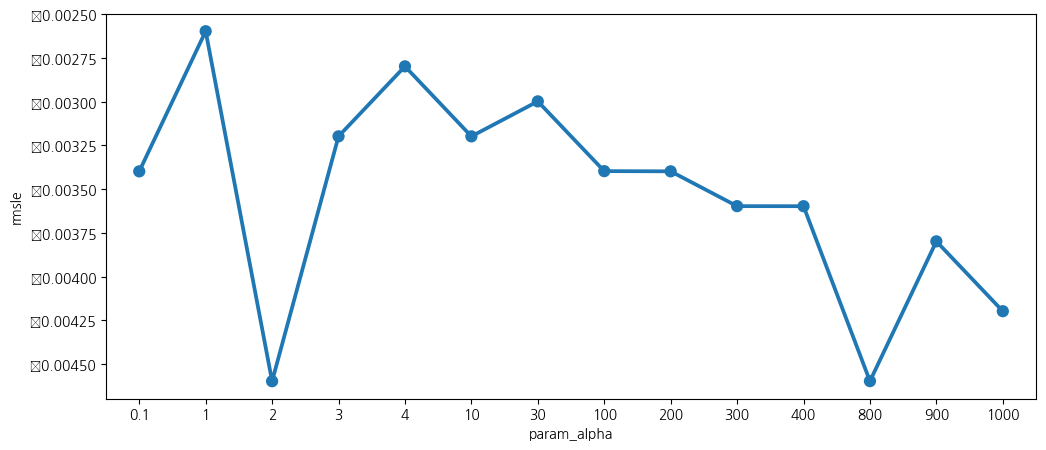

In [254]:
# 위와 같음 그냥 입력연습
# %%time
# ridge_m = Ridge()
# ridge_params_ = {'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# rmsle_corer = metrics.make_scorer(rmsle, greater_is_better=False)
# grid_ridge_m = GridSearchCV( ridge_m_,
#                             ridge_params_,scoring = rmsle_scorer, cv=5)
# yLabelsLog = np.log1p(yLabels)
# grid_ridge_m.fit( dataTrain, yLabelsLog)
# preds = grid_ridge_m.predict(X= dataTrain)
# print (grid_ridge_m.best_params_)
# print ("RMSLE Value For Ridge Regression", rmsle(np.exp(yLabelsLog), np.exp(preds)))
# fig, ax= plt.subplots()
# fig.set_size_inches(12,5)
# df = pd.DataFrame(grid_ridge_m.cv_results_)
# df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
# sns.pointplot(data=df,x=df['param_alpha'],y='rmsle',ax=ax)


- 휘어지는 그래프 s자형 회귀
- Regularization Model - Lasso

{'alpha': 0.0033333333333333335, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9779400935097249


<Axes: xlabel='param_alpha', ylabel='rmsle'>

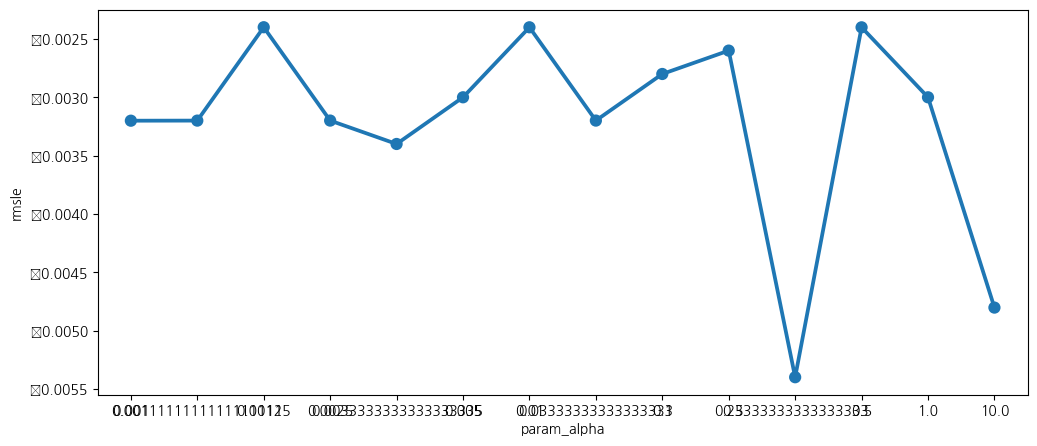

In [255]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds)))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["rmsle"] = df["mean_score_time"].apply(lambda x:-x)
sns.pointplot(data=df,x=df['param_alpha'],y="rmsle",ax=ax)

## Logistic Regression


## Logistic function

$g(x) = {\dfrac {e^x}{1+e^x}}$

다른 말로 시그모이드(Sigmoid)함수라고 함. 그 모양이 S자와 유사한 성질이 있음.

독립변수의 선형결학을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계기법.

앞에서 선형회귀에서 우리는 1차 선형함수를 배웠다.

$y = Wx+b$

$y = W_1X_1+W_2X_2 +\cdots + W_nX_n +b$

오즈비

${\dfrac{p}{1-p}}$

$ln{\dfrac{p}{1-p}} = WX$

${\dfrac{p}{1-p}} = e^{WX}$

양변에 역수를 취하면,

${\dfrac{1-p}{p}} = {\dfrac{1}{p}}-1 = {\dfrac{1}{e^{WX}}}$

${\dfrac{1}{p}} = {\dfrac{1}{e^{WX}}} +1 = {\dfrac
{1}{e^{WX}}}+{\dfrac{e^{WX}}{e^{WX}}} = {\dfrac{1+e^{WX}}{e^{WX}}}$

다시 한번 역수를 취하면

$p = {\dfrac {e^{WX}}{1+e^{{WX}}}}$

우리가 아는 식으로 변형하면

$p = {\dfrac{e^{WX}}{1+e^{WX}}} \cdot {\dfrac{{\dfrac {1}{e^{WX}}}}{{\dfrac{1}{e^{WX}}}}} = {\dfrac{1}{\dfrac{1}{e^{WX}}+1}} = {\dfrac {1}{e^{-WX}}}$ 

위스콘신 유방암 예측

총 309개의 속성과 malignant(악성), benign(양성)의 타겟값을 가지고 있다. (데이터셋 조회)  

빌트인 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용합니다.

key-value 형식으로 구성되어 있으며, 사전(dict)형 타입과 유사한 구조를 가지고 있습니다.

공통 key는 다음과 같습니다.

data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.  
target: Label 데이터, Numpy 배열로 이루어져 있습니다.  
feature_names: Feature 데이터의 이름  
target_names: Label 데이터의 이름  
DESCR: 데이터 셋의 설명  
filename: 데이터 셋의 파일 저장 위치 (csv)  

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [284]:
type(cancer)

sklearn.utils.Bunch

In [285]:
dir(cancer) # 데이터셋의 속성과 메소드 목록을 반환하는 파이썬 내장 함수

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [286]:
cancer.data.shape # 데이터셋의 데이터 배열의 크기(행, 열)를 반환

(569, 30)

In [287]:
cancer.feature_names # cancer.feature_names
# ('mean radius', 'mean texture', 'mean perimeter', 'mean area' 등은 종양의 크기와 관련된 특성)

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [288]:
cancer.target # 방암 데이터셋에서 각 샘플(환자)이 양성 종양인지 음성 종양인지를 나타내는 이진 분류 레이블


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [289]:
np.bincount(cancer.target) # 빈도수, 배열의 각 값이 몇 번 나타나는지 계산하여 반환하는 NumPy 함수
# 배열에 악성 종양이 212개, 양성 종양이 357개 있다면 : 0(악성)이 212개, 1(양성)이 357개 반환

array([212, 357], dtype=int64)

In [290]:
print(cancer.DESCR) # sklearn.datasets에서 제공하는 유방암 데이터셋에 대한 정보를 담고 있는 문자열

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [291]:
for i, name in enumerate(cancer.feature_names): # #이름에 따라서 순번을 달아놓음.
    print('%02d: %s'%(i,name))
#  feature_names 속성에 있는 변수 이름을 숫자와 함께 출력합니다.
# 각 숫자는 해당 변수의 인덱스를 나타내며, 변수 이름은 해당 변수가 의미하는 바를 나타냅니다.
# 예를 들어, 출력 결과 중 첫 번째 줄은 "mean radius"가 변수의 인덱스 0에 해당한다는 것을 의미

00: mean radius
01: mean texture
02: mean perimeter
03: mean area
04: mean smoothness
05: mean compactness
06: mean concavity
07: mean concave points
08: mean symmetry
09: mean fractal dimension
10: radius error
11: texture error
12: perimeter error
13: area error
14: smoothness error
15: compactness error
16: concavity error
17: concave points error
18: symmetry error
19: fractal dimension error
20: worst radius
21: worst texture
22: worst perimeter
23: worst area
24: worst smoothness
25: worst compactness
26: worst concavity
27: worst concave points
28: worst symmetry
29: worst fractal dimension


In [292]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>', malignant.shape)
print('benign(악성) =>', benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(악성) => (357, 30)


In [293]:
len(cancer.feature_names)

30

In [294]:
len(cancer.data)

569

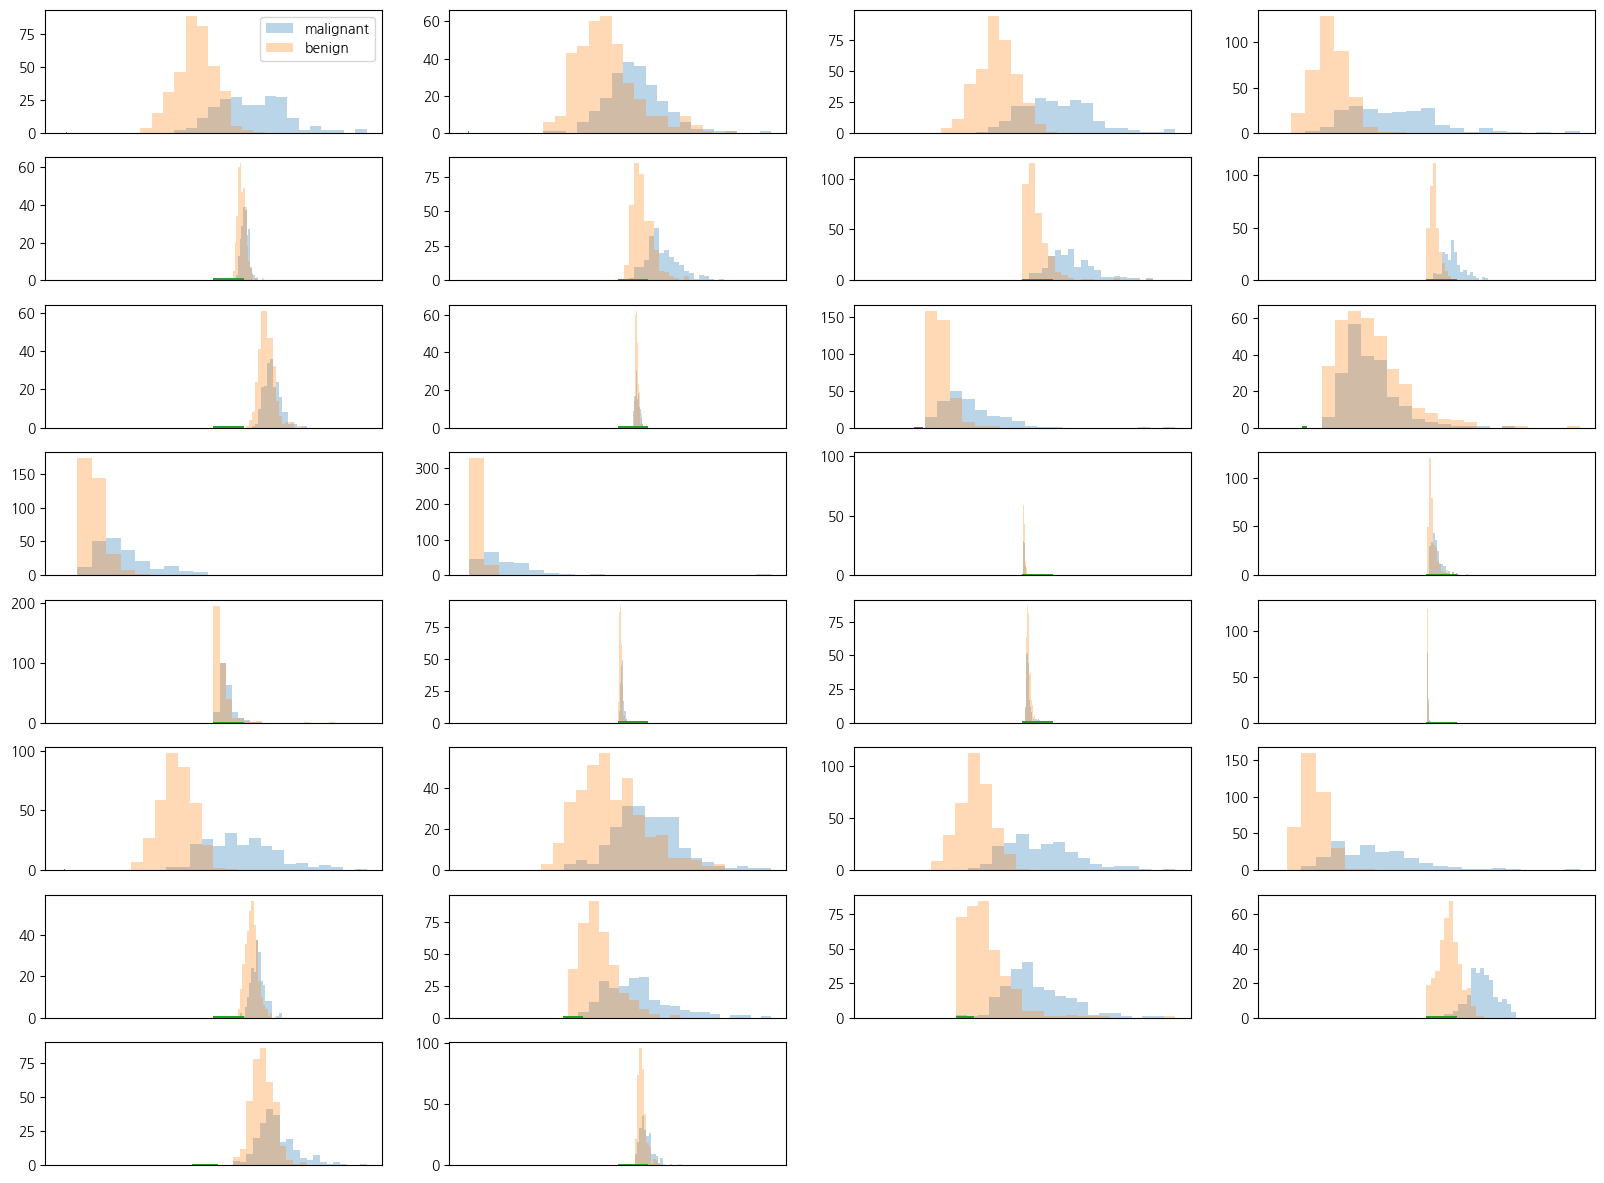

In [296]:
plt.figure(figsize=[20, 15])
for col in range(len(cancer.feature_names)):
    plt.subplot(8 ,4, col+1)
    _,bins = np.histogram(cancer.data[:,col], bins=20)
    
    plt.hist(malignant[:,col], bins=bins, alpha=0.3)
    plt.hist(benign[:,col], bins=bins, alpha=0.3)
    plt.hist(cancer.feature_names[col])
    if col==0: plt.legend(cancer.target_names)
    plt.xticks([])
    
# plt.figure(figsize=[20,15])

# for col in range(len(cancer.feature_names)):
#     plt.subplot(8,4,col+1)
#     _,bins = np.histogram(cancer.data[:,col],bins=20)

#     plt.hist(malignant[:,col], bins=bins,alpha=0.3)
#     plt.hist(benign[:,col], bins=bins,alpha=0.3)
#     plt.title(cancer.feature_names[col])
#     if col==0:plt.legend(cancer.target_names)
#     plt.xticks([])

In [301]:
from sklearn.linear_model import LogisticRegression
scores=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                       test_size= 0.2)
                                                       #random_state= 777) 얘가 있으면 똑같이 있어서(고정값) 의미 없음
    model = LogisticRegression(max_iter =5000)
    model.fit(X_train, y_train)
    
    score=model.score(X_test, y_test)
    scores.append(score)
print('scores=', scores)
# K 폴드 교차 검증(K Fold Cross Validation) 대신 for 문으로 비슷하게 기능을 사용했음 같진않음

scores= [0.9736842105263158, 0.9824561403508771, 0.9649122807017544, 0.9736842105263158, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.956140350877193]


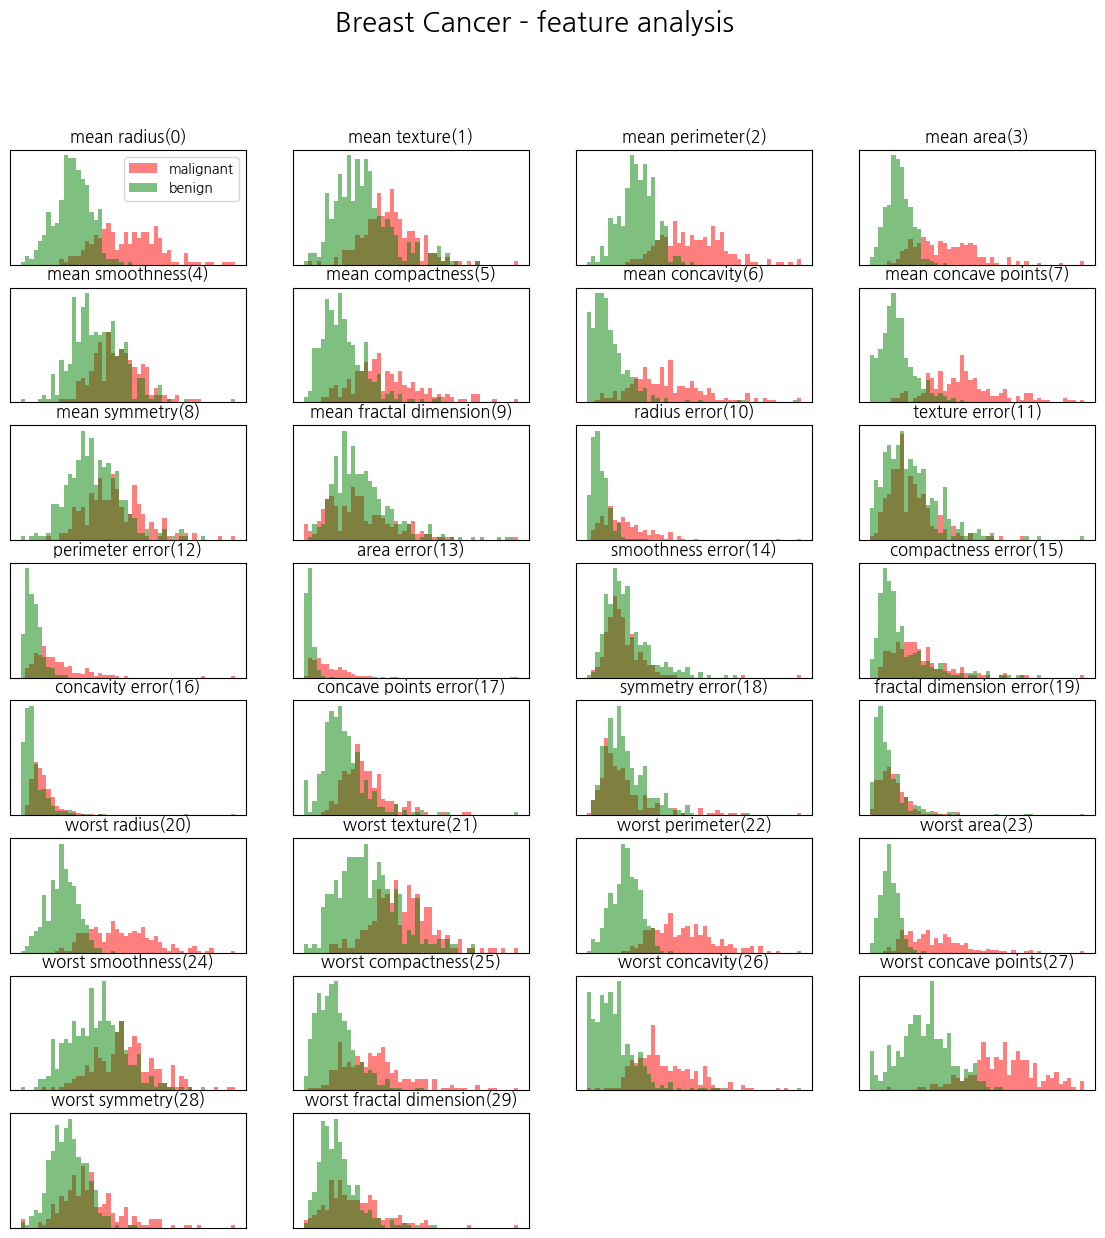

In [304]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

앞에서 했던 타이타닉에도 로지스틱이 더 좋은 결과가 나옴  
로지스틱 회귀 실습 3  
- 독버섯 분류하기(https://www.kaggle.com/uciml/mushroom-classification)  
- 목적 : 독버섯(poisonous)인지 식용버섯(edible)인지 분류하는 것.

In [308]:
mushroom= pd.read_csv("C:/Users/5/My_Study/z_running_file/archive/mushrooms.csv")
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [311]:
from sklearn.preprocessing import LabelEncoder
# 라벨 인코딩 이라는 것은 이름으로 되어 있는 것을 숫자로 혹은 그 반대로 변환 하는 것
Labelencoder = LabelEncoder()
for col in mushroom.columns:
    mushroom[col] = Labelencoder.fit_transform(mushroom[col]) # column별로 LabelEncoder를 적용
    # fit_transform 내 데이터(?)에 적용 하면서(fit), 녹여달라(transform)
mushroom

# fit() 메서드를 사용하여 데이터를 분석하고 전처리를 위한 파라미터를 학습합니다
# 학습한 파라미터를 기반으로 transform() 메서드를 사용하여 입력 데이터를 전처리
# Scikit-learn과 같은 머신 러닝 라이브러리에서는 두 메서드를 합쳐 놓은 fit_transform() 메서드를 제공

# ex : StandardScaler는 입력 데이터를 평균 0, 표준편차 1로 전처리합니다.  
# 이를 수행하기 위해 먼저 fit() 메서드를 호출하여 평균과 표준편차를 계산하고,  
# 그 결과를 기반으로 transform() 메서드를 호출하여 입력 데이터를 전처리합니다.  
# 이 두 과정을 fit_transform() 메서드로 한 번에 수행할 수 있음

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


[Text(0.5, 1.0, 'Unique elements per column'),
 Text(0, 0.5, 'No of unique elements'),
 Text(0.5, 0, 'Features')]

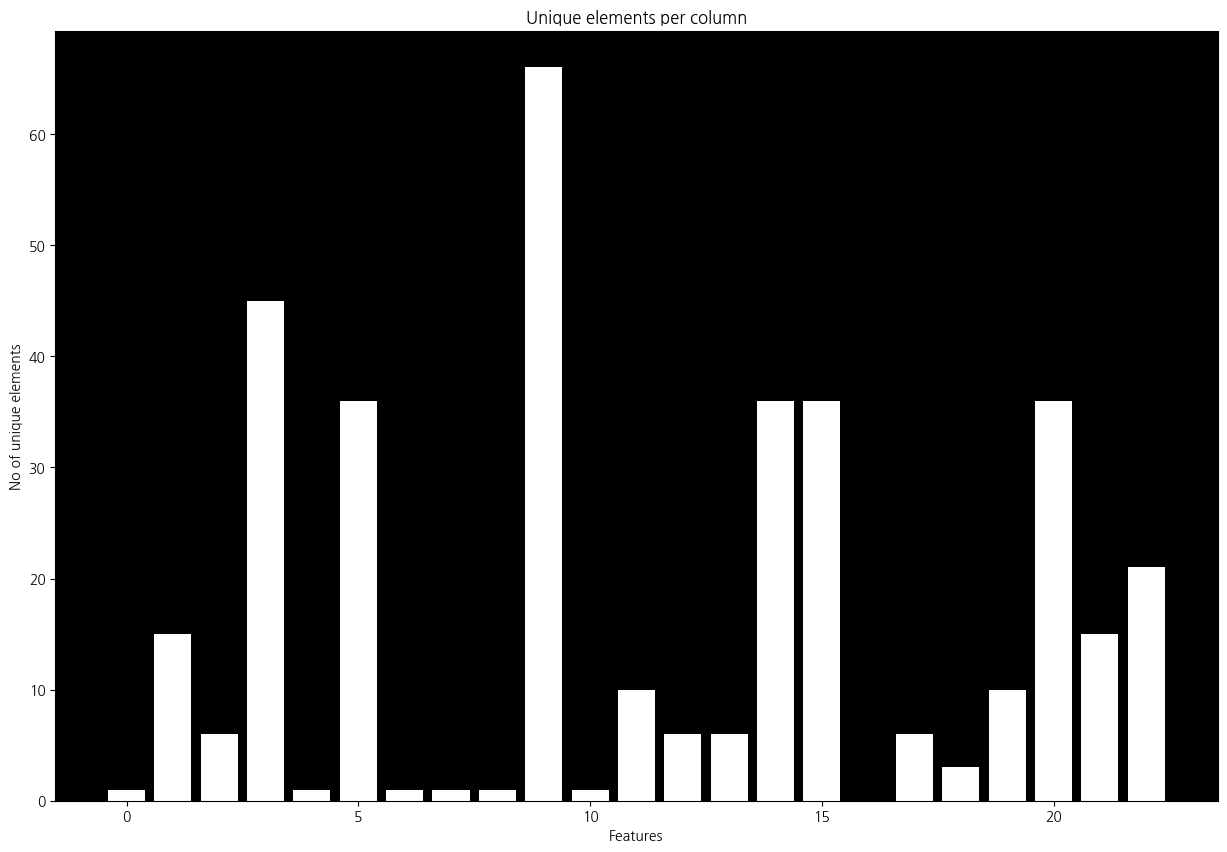

In [320]:
count_var = []
for col in mushroom.columns:
    count_var.append(mushroom[col].unique().sum()) # Series 접근-> column으로 접근하니깐, Series와 같음
    # dataframe duplicated, duplicates -> 중복 제거
size = np.arange(len(count_var))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1,facecolor='black')
ax.bar(size, count_var, color='w')
ax.set(title='Unique elements per column',
       ylabel = 'No of unique elements',
       xlabel = 'Features')

<Axes: >

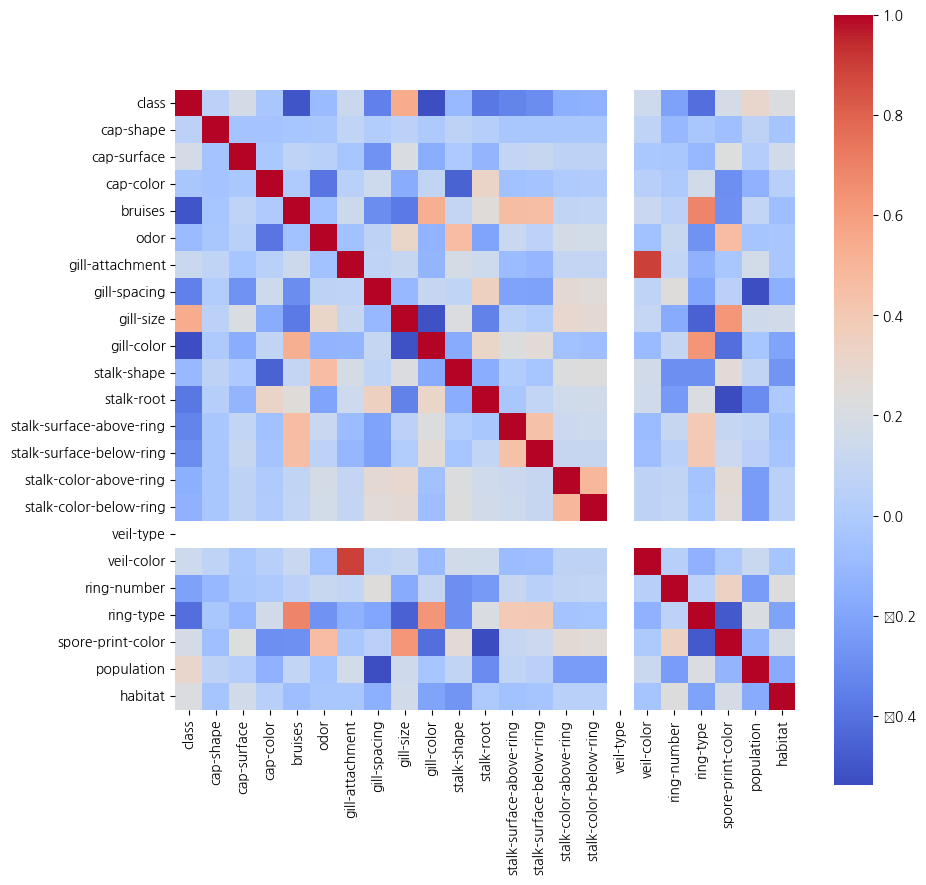

In [356]:
plt.figure(figsize=(10,10))
sns.heatmap(mushroom.corr(), cmap='coolwarm', square=True)

In [330]:
target= mushroom['class']
train= mushroom.drop('class', axis=1)

Text(0.5, 1.0, 'Class distribution')

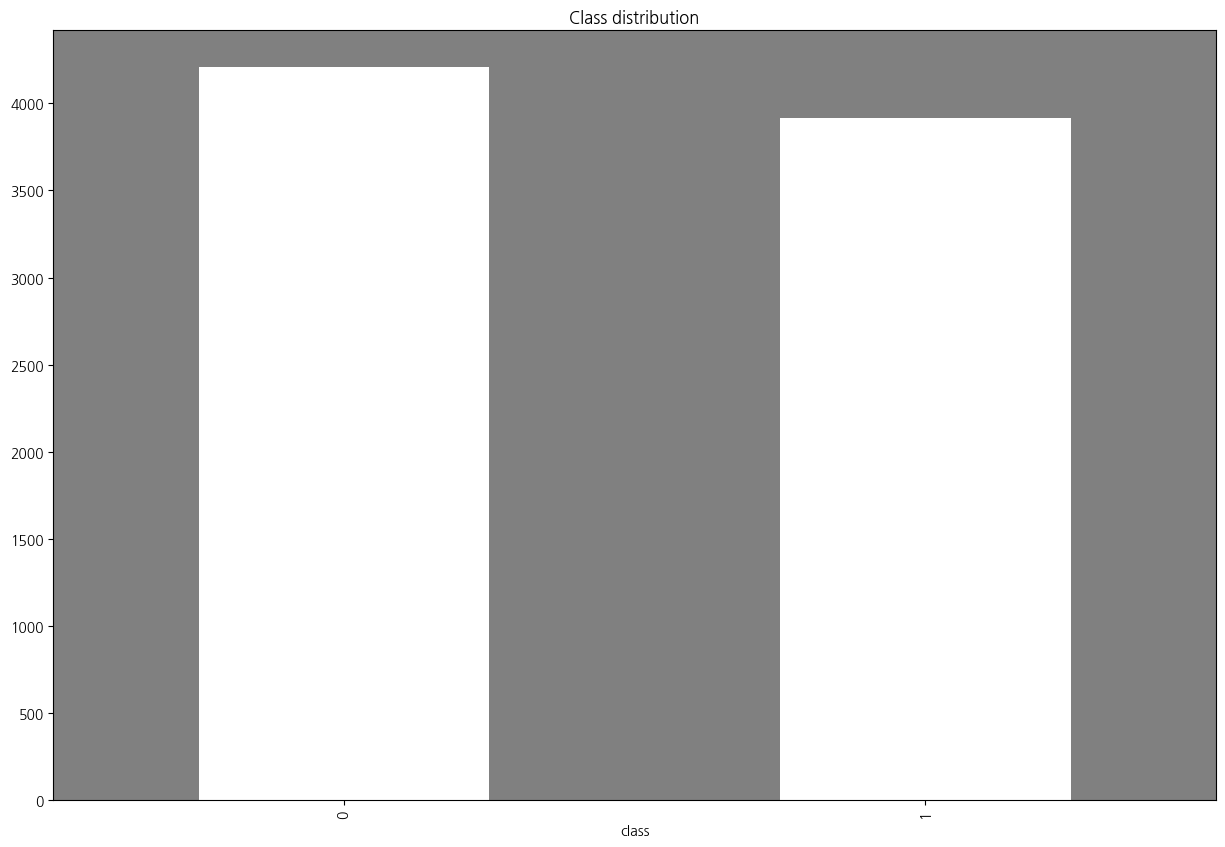

In [352]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1,facecolor='gray')
pd.value_counts(target).plot(kind='bar', cmap='binary')
plt.title('Class distribution')